In [ ]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 34135671.06it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 97847894.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43233238.08it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4053303.99it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
x = X[3,0,:,:]

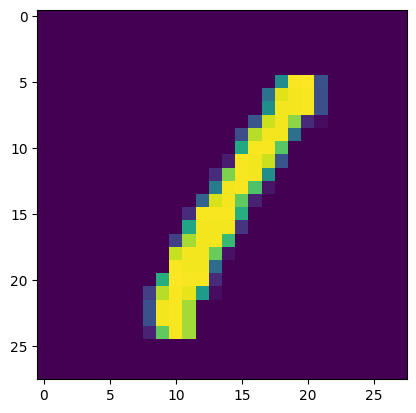

In [ ]:
plt.imshow(x)

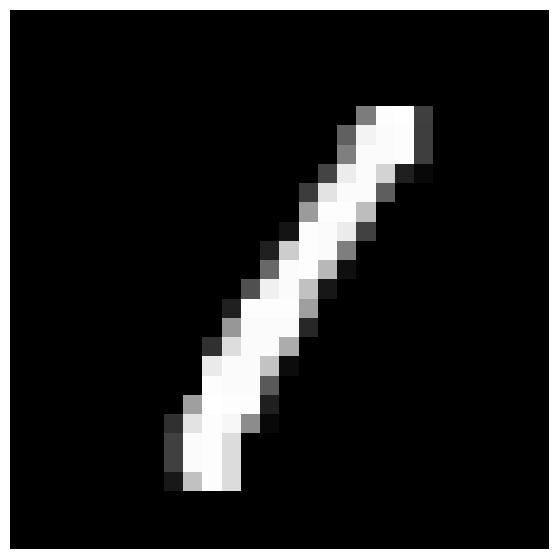

In [ ]:
plot(x)

In [ ]:
x.shape

(28, 28)

In [ ]:
x.shape[0]

28

In [ ]:
x.shape[1]

28

In [ ]:
x = x.reshape(x.shape[0]*x.shape[1],1)

In [ ]:
x.shape

(784, 1)

In [ ]:
x = x.reshape(28,28)

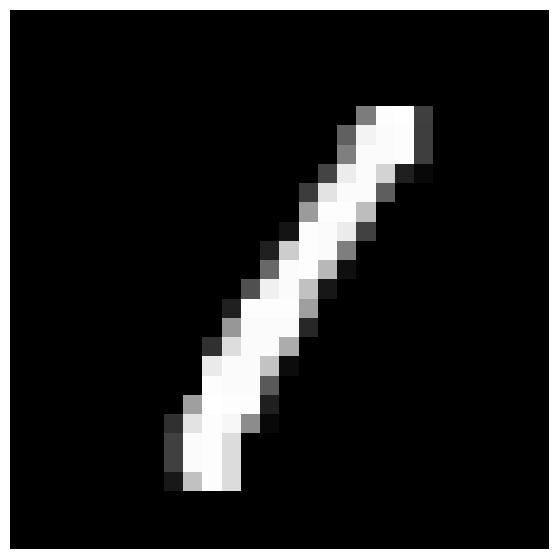

In [ ]:
plot(x)

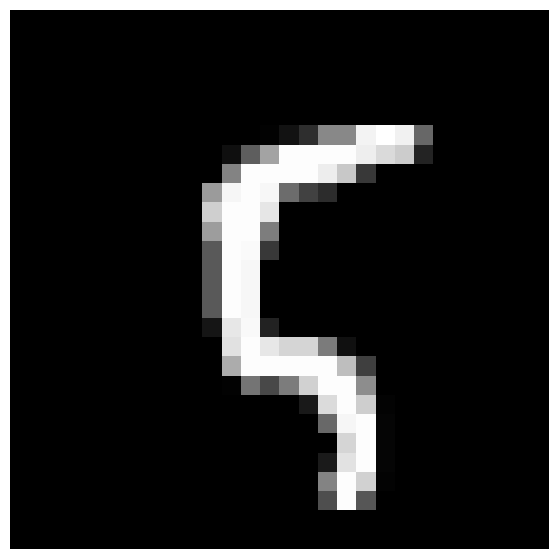

In [ ]:
plot(X[100,0,:,:])

In [ ]:
Y[120]

2

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

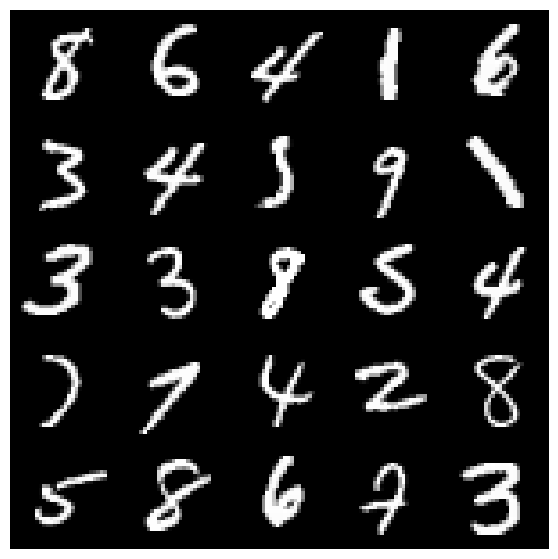

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[1]

1

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

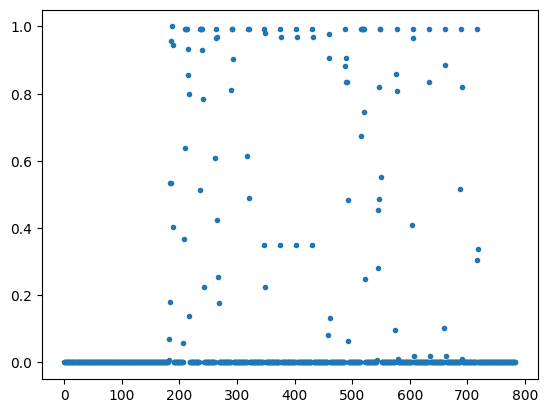

In [ ]:
plt.plot(X[100],'.')

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
###################################################

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X = X.T

In [ ]:
X.shape

torch.Size([784, 60000])

In [ ]:
x = X[:,0:64]

In [ ]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

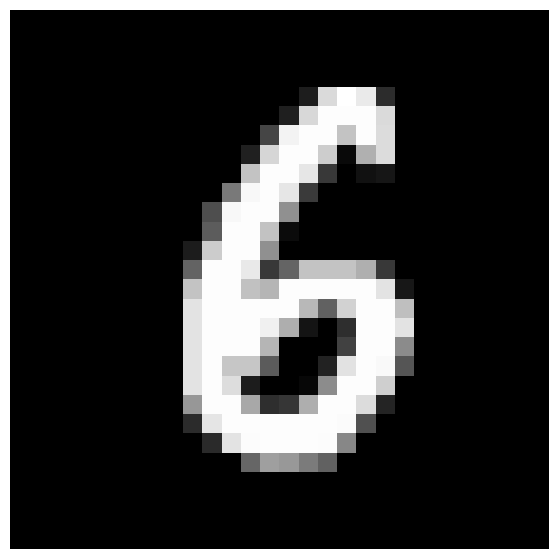

In [ ]:
plot(x[:,62].reshape(28,28))

In [ ]:
M = GPU(np.random.rand(10,784))

In [ ]:
M.shape,x.shape

(torch.Size([10, 784]), torch.Size([784, 64]))

In [ ]:
#M@x

In [ ]:
y = M@x

In [ ]:
y.shape

torch.Size([10, 64])

In [ ]:
torch.max(y,0)

torch.return_types.max(
values=tensor([57.9111, 68.1139, 41.5454, 38.0118, 49.5515, 61.7173, 36.7544, 76.2139,
        24.8282, 47.5695, 61.1844, 33.1717, 75.3345, 58.9802, 24.8097, 53.9463,
        50.8648, 58.6303, 29.2499, 38.7614, 73.8350, 75.4458, 34.1948, 36.4473,
        47.0416, 87.9732, 27.7992, 98.5799, 88.4018, 30.9793, 54.5321, 73.3499,
        36.9700, 45.7032, 78.6101, 33.5515, 65.9234, 82.4778, 47.7008, 54.9644,
        29.8478, 59.1570, 26.3873, 37.0484, 38.3322, 50.1884, 48.2924, 47.5448,
        37.0489, 71.3254, 42.1914, 94.7634, 60.9659, 37.0503, 48.8766, 67.2230,
        88.4355, 42.7995, 71.9903, 39.1336, 66.1836, 38.1584, 64.3073, 96.1938],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([4, 2, 0, 7, 3, 7, 0, 7, 0, 7, 2, 7, 7, 3, 0, 2, 5, 7, 2, 7, 7, 2, 7, 7,
        2, 4, 7, 7, 2, 0, 2, 7, 5, 7, 2, 0, 2, 2, 2, 2, 0, 2, 0, 7, 7, 2, 7, 4,
        2, 4, 2, 2, 2, 7, 0, 3, 3, 2, 7, 7, 3, 7, 7, 2], device='cuda:0'))

In [ ]:
y = torch.argmax(y,0)

In [ ]:
y

tensor([4, 2, 0, 7, 3, 7, 0, 7, 0, 7, 2, 7, 7, 3, 0, 2, 5, 7, 2, 7, 7, 2, 7, 7,
        2, 4, 7, 7, 2, 0, 2, 7, 5, 7, 2, 0, 2, 2, 2, 2, 0, 2, 0, 7, 7, 2, 7, 4,
        2, 4, 2, 2, 2, 7, 0, 3, 3, 2, 7, 7, 3, 7, 7, 2], device='cuda:0')

In [ ]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

In [ ]:
y == Y[0:64]

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False], device='cuda:0')

In [ ]:
torch.sum((y == Y[0:64]))

tensor(1, device='cuda:0')

In [ ]:
torch.sum((y == Y[0:64]))/64

tensor(0.0156, device='cuda:0')

In [ ]:
x.shape

In [ ]:
batch_size = 64

M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.0938, device='cuda:0')

In [ ]:
z = np.random.rand(10,784)

In [ ]:
z.shape

(10, 784)

In [ ]:
z.shape[0],z.shape[1]

(10, 784)

In [ ]:
count = z.shape[0]*z.shape[1]

In [ ]:
z = z.reshape(count,)

In [ ]:
z.shape

(7840,)

In [ ]:
z = np.random.rand(10,784)

In [ ]:
z.shape

(10, 784)

In [ ]:
z = z.flatten()

In [ ]:
z.shape

(7840,)

In [ ]:
z = np.random.rand(1000,78)

In [ ]:
z = z.reshape(-1)

In [ ]:
z.shape

(78000,)

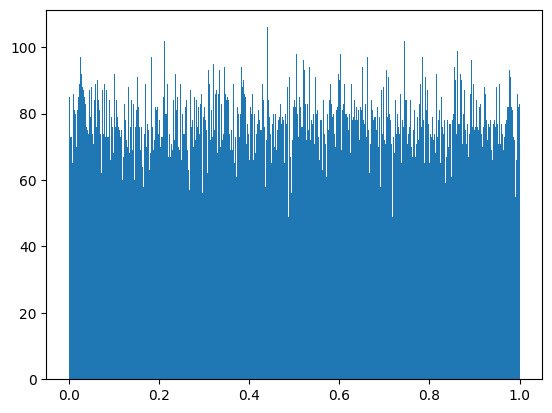

In [ ]:
plt.hist(z,1000);

In [ ]:
z = 1000*np.random.rand(10000) + 100

In [ ]:
z

array([866.25249871, 911.49463597, 471.00234553, ..., 530.52564419,
       444.0608602 , 995.59462142])

In [ ]:
np.max(z)

1099.9474113592928

In [ ]:
z =z.astype(int)

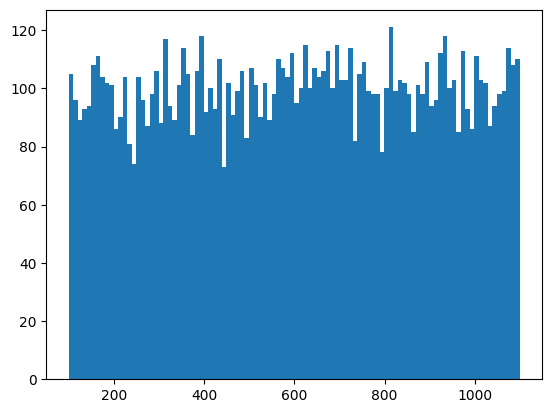

In [ ]:
plt.hist(z,100);

In [ ]:
z

array([866, 911, 471, ..., 530, 444, 995])

In [ ]:
z = 10*np.random.randn(10000) - 10

In [ ]:
z = z.flatten()

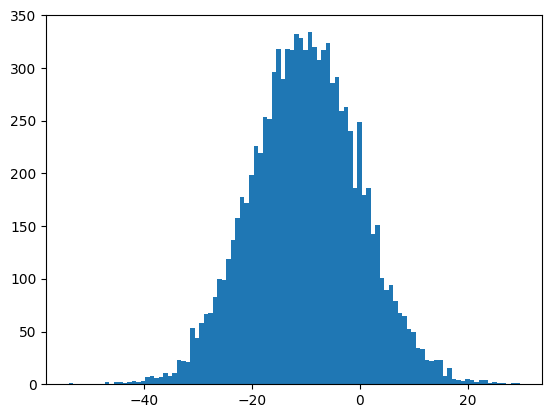

In [ ]:
plt.hist(z,100);

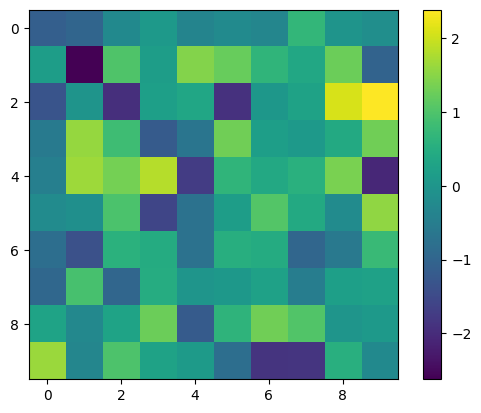

In [ ]:
z = np.random.randn(10,10)
plt.imshow(z)
plt.colorbar()

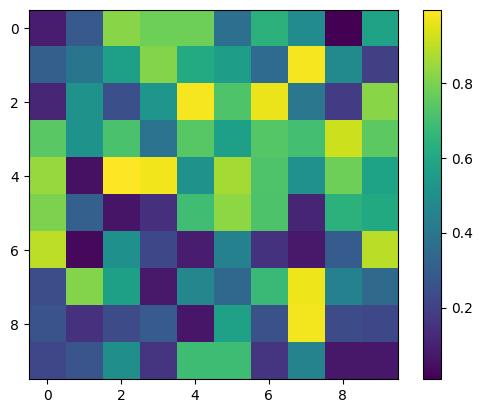

In [ ]:
z = np.random.rand(10,10)
plt.imshow(z)
plt.colorbar()

In [ ]:
M_Best = 0
Score_Best = 0

for i in range(100000):

    M_new = GPU(np.random.rand(10,784))

    y = M_new@x

    y = torch.argmax(y,0)

    Score = (torch.sum((y == Y[0:batch_size]))/batch_size).item()

    if Score > Score_Best:

        Score_Best = Score
        M_Best = M_new

        print(i,Score_Best)



0 0.03125
2 0.140625
16 0.203125
124 0.21875
388 0.234375
1333 0.265625
2040 0.28125
4120 0.296875
6314 0.3125
10986 0.328125
40853 0.359375


In [ ]:
#37

In [ ]:
plot(GPU(np.random.randn(10,784)))

In [ ]:
# Random Walk

In [ ]:
import torch
import numpy as np
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [ ]:
def plot(x,title=None):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)
    plt.show()

In [ ]:
##MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

100%|██████████| 18165135/18165135 [00:09<00:00, 1990012.30it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 277242.32it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:02<00:00, 1283577.52it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 6569237.22it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

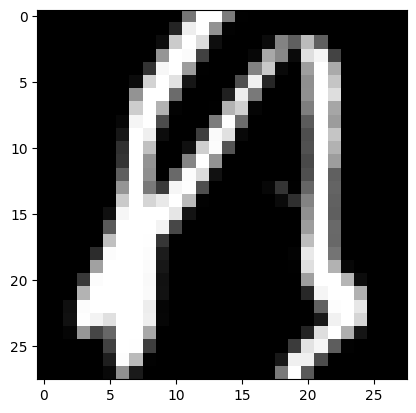

In [ ]:
plt.imshow(X[0,0,:,:],cmap='gray')

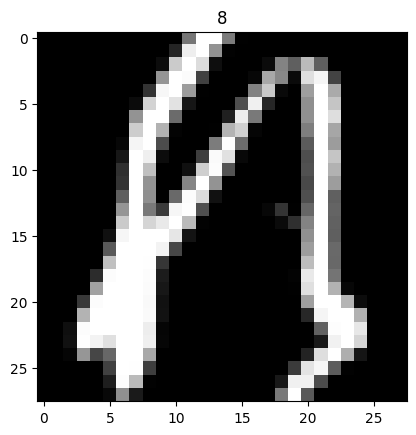

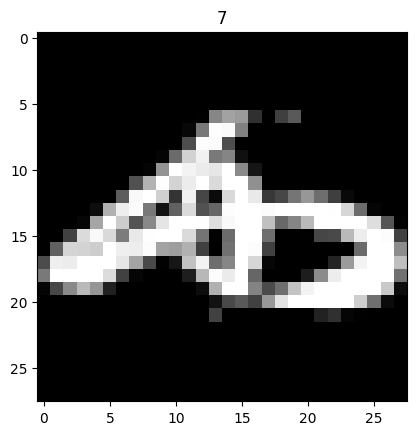

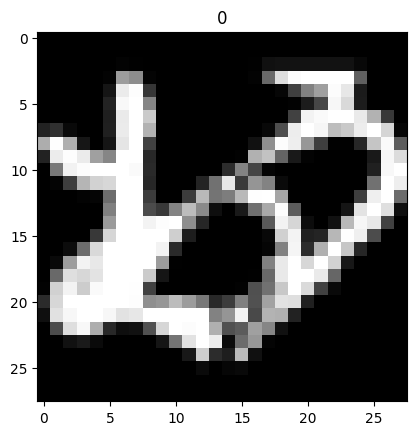

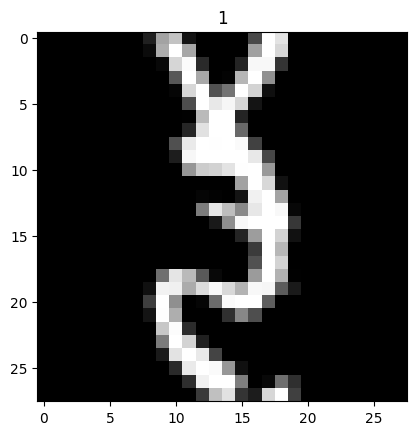

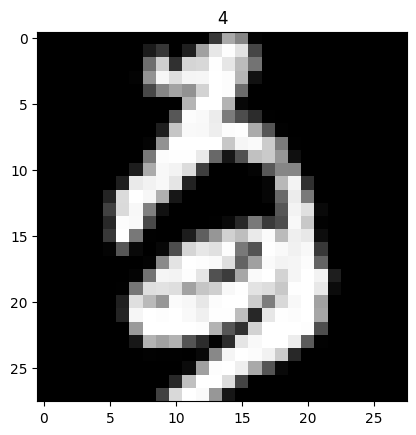

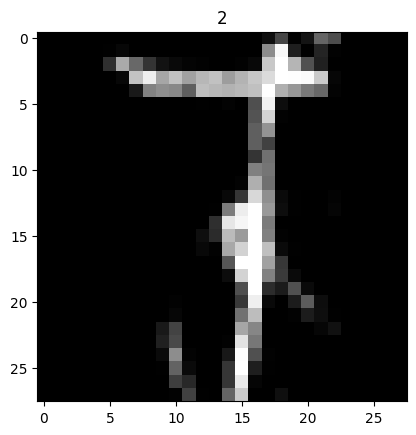

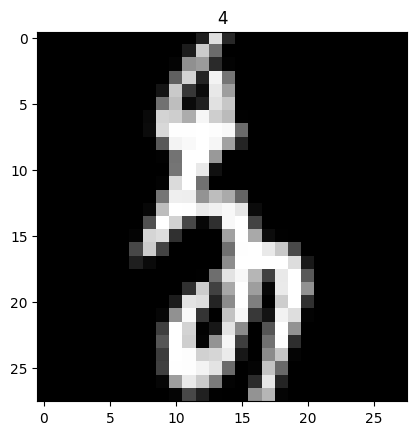

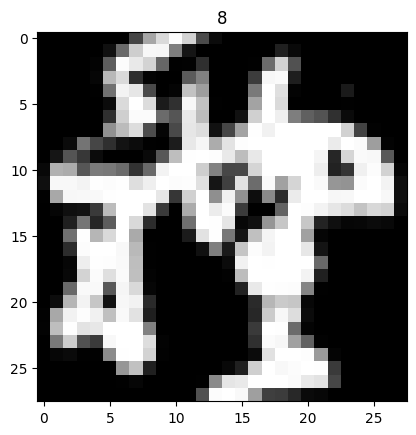

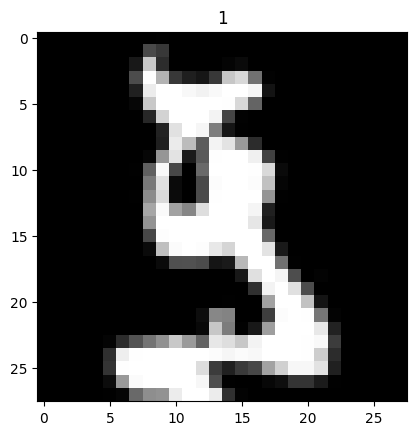

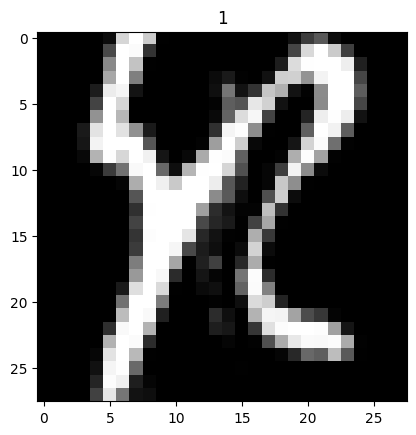

In [ ]:

for i in range(10):
    plt.imshow(X[i,0,:,:],cmap='gray')
    plt.title(str(Y[i]))
    plt.show()

In [ ]:
Y[0:10]

array([8, 7, 0, 1, 4, 2, 4, 8, 1, 1])

In [ ]:
X[0,0,:,:].shape

(28, 28)

In [ ]:
x = X[0,0,:,:].flatten()

In [ ]:
x.shape

(784,)

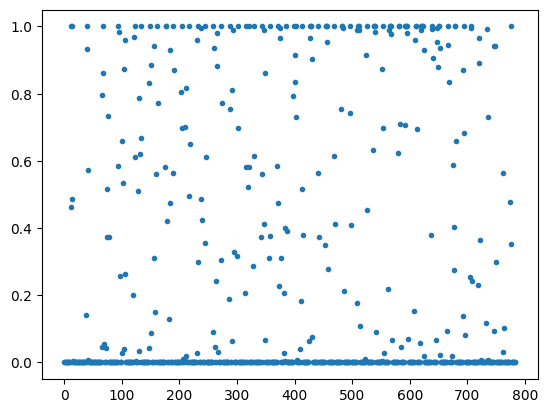

In [ ]:
plt.plot(x,'.')

In [ ]:
Y[0]

8

In [ ]:
x = x[:,None]

In [ ]:
x.shape

(784, 1)

In [ ]:
m = np.random.standard_normal((10,784))

In [ ]:
m.shape,x.shape

((10, 784), (784, 1))

In [ ]:
y = m@x # @ mean matmul

In [ ]:
y = np.matmul(m,x)

In [ ]:
y.shape

(10, 1)

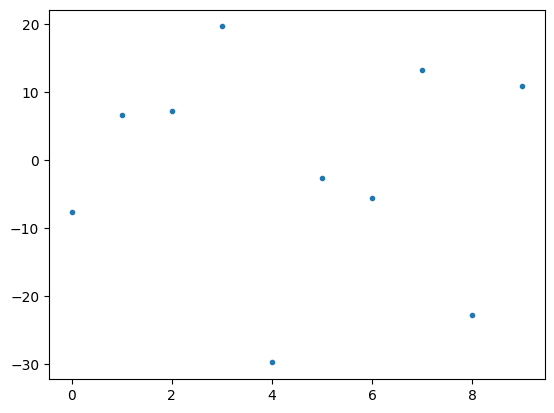

In [ ]:
plt.plot(y,'.')

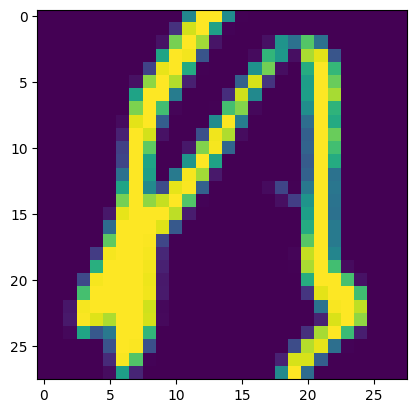

In [ ]:
plt.imshow(x.reshape(28,28))

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X.shape[2]*X.shape[3]

784

In [ ]:
X = np.reshape(X, (X.shape[0],X.shape[2]*X.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[2]*X_test.shape[3]))

In [ ]:
X.shape

(60000, 784)

In [ ]:
plt.imshow(X[1000,:].reshape(28,28))

NameError: name 'plt' is not defined

In [ ]:
Y[1000]

3

In [ ]:
x = X[0:2,:]

In [ ]:
x.shape

(2, 784)

In [ ]:
x = x.T

In [ ]:
m.shape,x.shape

((10, 784), (784, 2))

In [ ]:
y = m@x

In [ ]:
y

array([[ -7.64782174,  14.35284883],
       [  6.60929191,   7.86742468],
       [  7.28472205,  17.21911334],
       [ 19.64907079, -13.47532084],
       [-29.72042207,  -8.60534712],
       [ -2.59227268,  -9.96086802],
       [ -5.52894478, -17.8393249 ],
       [ 13.18928013,   9.09499273],
       [-22.75036735, -14.3148249 ],
       [ 10.8377317 , -11.53241476]])

In [ ]:
np.max(y, axis=0)

array([19.64907079, 17.21911334])

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
Y[0:2]

array([8, 7])

In [ ]:
y_ans = Y[0:2]

In [ ]:
y_ans

array([8, 7])

In [ ]:
y

array([3, 2])

In [ ]:
np.sum((y == y_ans))/len(y)

0.0

In [ ]:
X.shape

(60000, 784)

In [ ]:
X = X.T

In [ ]:
X_test = X_test.T

In [ ]:
m.shape,X.shape

((10, 784), (784, 60000))

In [ ]:
y = m@X

In [ ]:
y.shape

(10, 60000)

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
y_ans = Y

In [ ]:
acc = np.sum(y == y_ans)/len(Y)

In [ ]:
acc

0.0701

In [ ]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == y_ans)/len(Y)

print(acc)

0.08253333333333333


In [ ]:
m_best = 0
acc_best = 0

for i in range(1000):

    m = 0.1*np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == y_ans)/len(Y)


    if acc > acc_best:
        print(acc)
        m_best = m
        acc_best = acc

0.09141666666666666
0.11043333333333333
0.1304
0.168
0.17205
0.18636666666666668
0.18826666666666667


In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
# def scale(img):
#     img_min = torch.min(img)
#     img_max = torch.max(img)
#     scaled = (img - img_min) / (img_max - img_min) * 1.0
#     return scaled

In [ ]:
# X = scale(X)
# X_test = scale(X_test)

In [ ]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.15354999899864197
0.17024999856948853
0.17268332839012146
0.18095000088214874
0.19513332843780518
0.2061166763305664
0.20986667275428772
0.21230000257492065
0.22273333370685577
0.2247166633605957
0.23250000178813934
0.23458333313465118
0.23636667430400848
0.23641666769981384
0.23703333735466003
0.23983334004878998
0.2455500066280365
0.2555333375930786
0.25760000944137573
0.26089999079704285
0.26475000381469727
0.2740499973297119
0.27531665563583374
0.2768999934196472
0.27906668186187744
0.2878666818141937
0.29573333263397217
0.2971666753292084
0.30568334460258484
0.31306666135787964
0.3235166668891907
0.32760000228881836
0.33678334951400757
0.3428666591644287
0.3435666561126709
0.3452666699886322
0.3457166850566864
0.35199999809265137
0.35374999046325684
0.3554333448410034
0.35975000262260437
0.3598499894142151
0.36061668395996094
0.3630666732788086
0.3696500062942505
0.372050017118454
0.3722499907016754
0.3755333423614502
0.3811333477497101
0.382916659116745
0.3868499994277954
0.388

In [ ]:
m_random = GPU_data(np.random.randn(10,784))

In [ ]:
m_random.shape

torch.Size([10, 784])

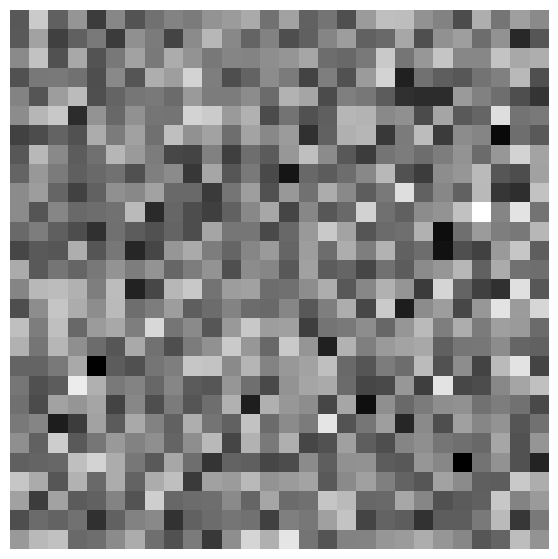

In [ ]:
plot(m_random[0,:].reshape(28,28))

In [ ]:
m_best.shape

torch.Size([10, 784])

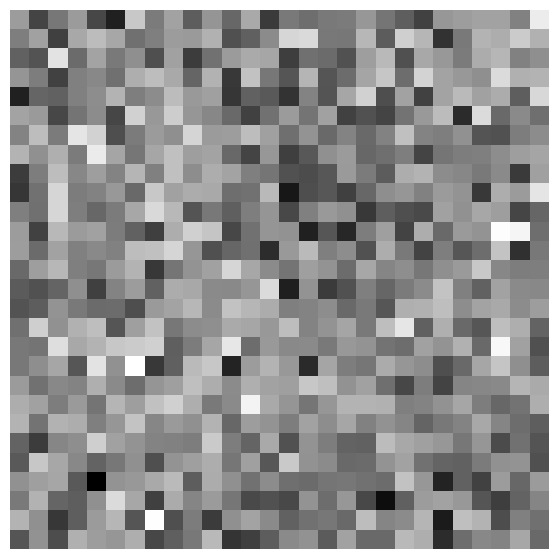

In [ ]:
plot(m_best[0,:].reshape(28,28))

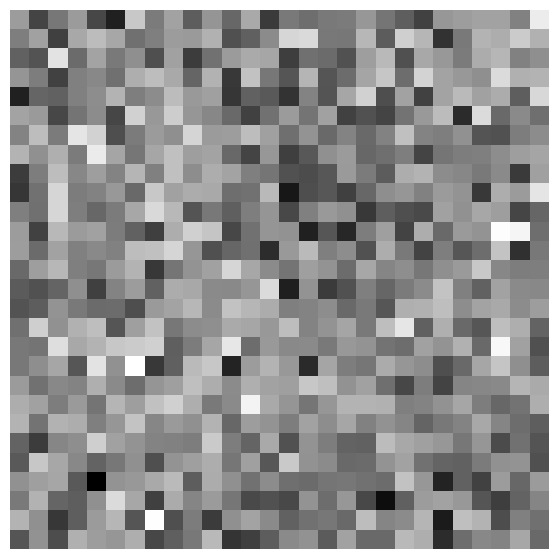

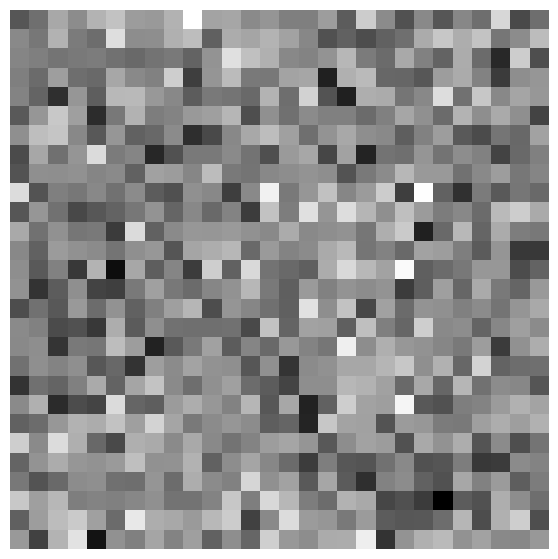

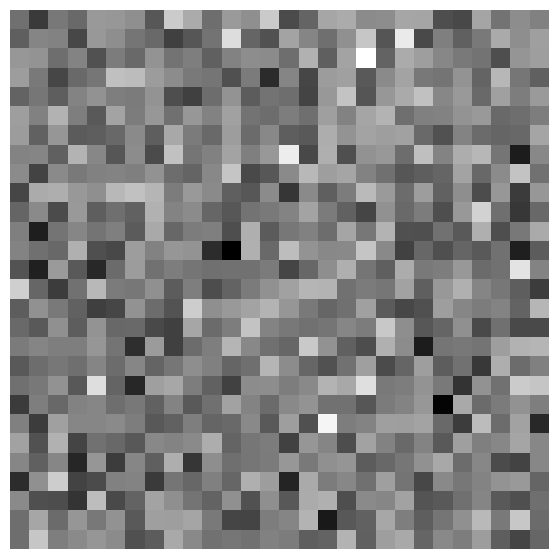

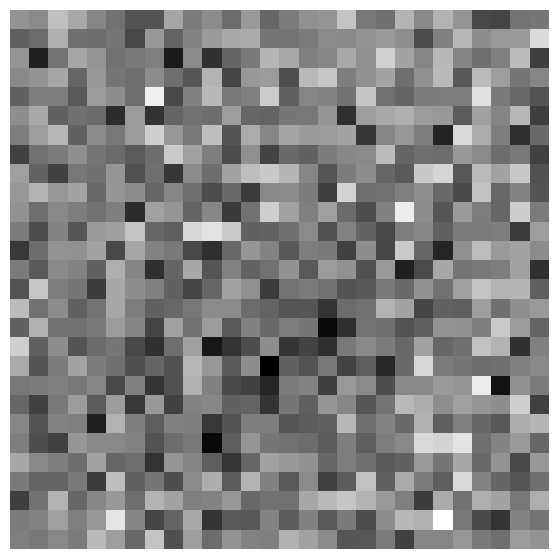

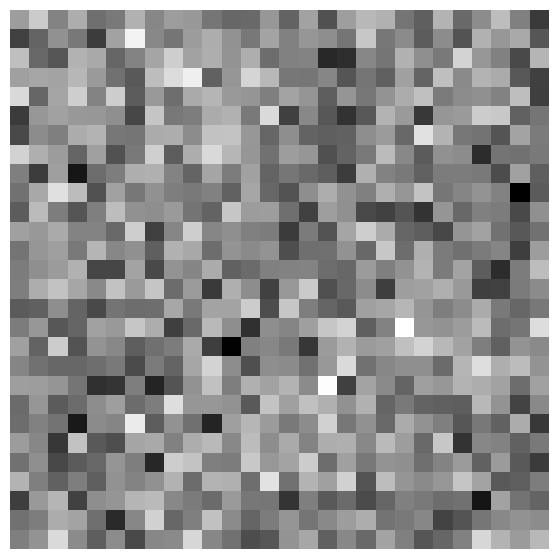

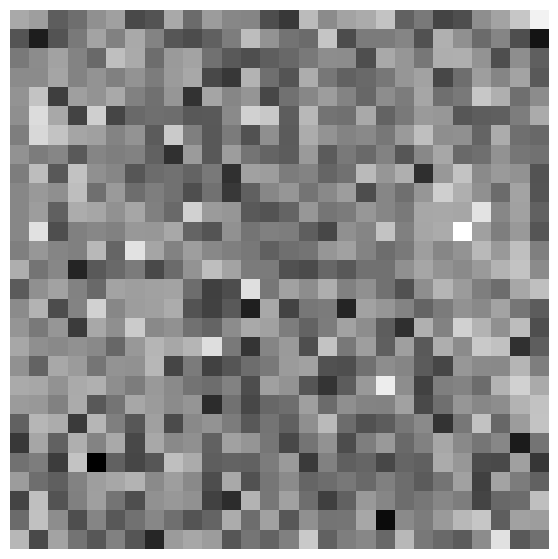

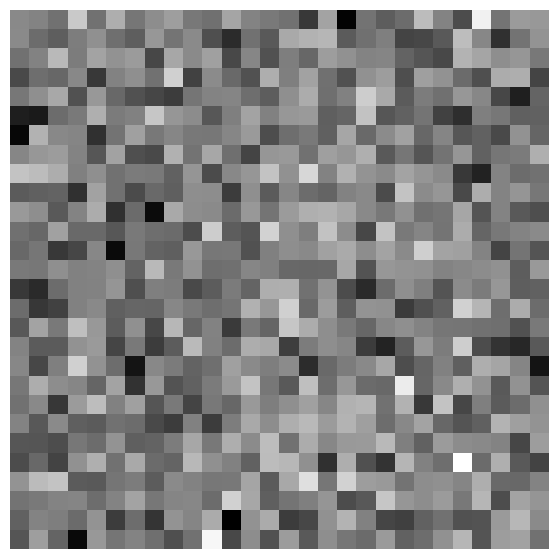

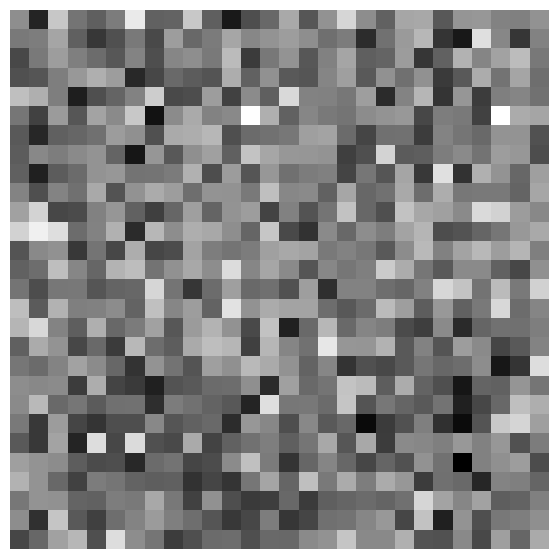

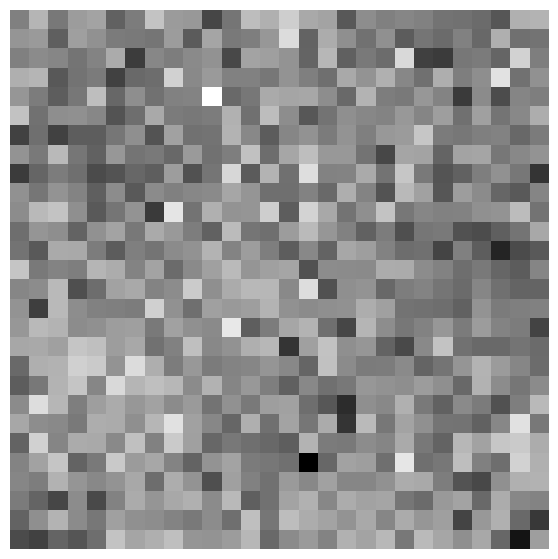

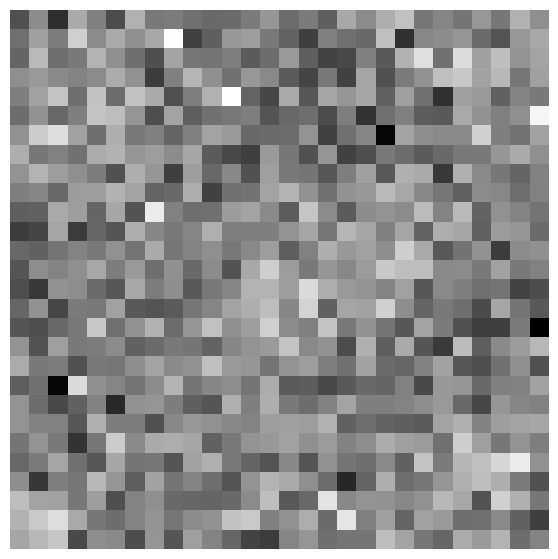

In [ ]:
for i in range(10):
    plot(m_best[i,:].reshape(28,28))

In [ ]:
M = GPU_data(np.random.random((100,10,784)))
M.shape,X.shape
(M@X).shape
(torch.argmax((M@X), axis=1) == Y).shape
Y.shape
y = torch.argmax((M@X), axis=1)
score = ((y == Y).sum(1)/len(Y))
s = torch.argsort(score,descending=True)
score[s]

tensor([0.1701, 0.1602, 0.1586, 0.1549, 0.1489, 0.1463, 0.1384, 0.1380, 0.1353,
        0.1340, 0.1311, 0.1296, 0.1285, 0.1262, 0.1256, 0.1253, 0.1236, 0.1232,
        0.1226, 0.1220, 0.1217, 0.1214, 0.1200, 0.1196, 0.1192, 0.1191, 0.1180,
        0.1152, 0.1145, 0.1133, 0.1133, 0.1104, 0.1101, 0.1098, 0.1096, 0.1084,
        0.1072, 0.1072, 0.1064, 0.1049, 0.1048, 0.1030, 0.1028, 0.1012, 0.1002,
        0.0999, 0.0993, 0.0992, 0.0969, 0.0955, 0.0952, 0.0950, 0.0946, 0.0946,
        0.0946, 0.0944, 0.0944, 0.0934, 0.0926, 0.0922, 0.0915, 0.0914, 0.0904,
        0.0903, 0.0901, 0.0883, 0.0879, 0.0879, 0.0875, 0.0872, 0.0867, 0.0865,
        0.0857, 0.0857, 0.0853, 0.0838, 0.0833, 0.0832, 0.0831, 0.0830, 0.0828,
        0.0813, 0.0793, 0.0791, 0.0766, 0.0745, 0.0741, 0.0739, 0.0736, 0.0710,
        0.0690, 0.0686, 0.0681, 0.0651, 0.0649, 0.0632, 0.0603, 0.0550, 0.0544,
        0.0478], device='cuda:0')

In [ ]:
N = 100
M = GPU_data(np.random.rand(N,10,784))

m_best = 0
acc_best = 0

step = 0.00000000001

for i in range(1000000):

    y = torch.argmax((M@X), axis=1)
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[50:100] = 0
    M[0:50] = M[0]
    M[1:] += step*GPU_data(np.random.rand(N-1,10,784))


    acc = score[s][0].item()

    if acc > acc_best:

        m_best = M[0]
        acc_best = acc

        print(i,acc)

0 0.16920000314712524
32 0.1764499992132187
33 0.20603333413600922
34 0.21406666934490204
35 0.23358333110809326
36 0.24033333361148834
37 0.25201666355133057
38 0.2727166712284088
39 0.2870500087738037
40 0.2906666696071625
41 0.2919166684150696
42 0.29571667313575745
43 0.30168333649635315
44 0.3111666738986969
45 0.322216659784317
46 0.32850000262260437
47 0.3421333432197571
48 0.34751665592193604
49 0.35503333806991577
50 0.3665499985218048
51 0.376716673374176
52 0.37956666946411133
53 0.38081666827201843
54 0.3850666582584381
55 0.39008334279060364
56 0.3956833481788635
57 0.3990333378314972
58 0.4062333405017853
59 0.41251668334007263
60 0.41366666555404663
61 0.41796666383743286
62 0.42035001516342163
63 0.423633337020874
64 0.4265333414077759
65 0.43025001883506775
66 0.4348166584968567
67 0.4389166831970215
68 0.443533331155777
69 0.444516658782959
70 0.44893333315849304
71 0.45098334550857544
72 0.4559166729450226
73 0.45660001039505005
75 0.4585166573524475
76 0.46076667308

In [ ]:
y_test = torch.argmax((M@X_test), axis=1)
score = ((y_test == Y_test).sum(1)/len(Y_test))
s = torch.argsort(score,descending=True)
acc_test = score[s][0].item()

In [ ]:
X_test.shape

In [ ]:
acc_test

In [ ]:
y_test[0]

In [ ]:
Y_test

In [ ]:
for i in range(10):

    guess = y_test[0,i].item()
    answer = int(Y_test[i])

    title = f"Guess: {guess}   ---   Actual: {answer}"
    plot(X_test[:,i].reshape(28,28),title)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO

def plot(x, title=None):
    if type(x) == torch.Tensor:
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap='gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)

# Convert the matplotlib plot to a base64 encoded image
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight')
    plt.close()
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Generate the HTML content
html_content = "<html><body>"

for i in range(10):

    guess = y_test[0, i].item()
    answer = int(Y_test[i])

    title = f"Guess: {guess}   ---   Actual: {answer}"
    plot(X_test[:,i].reshape(28,28),title)
    img_b64 = plot_to_base64()


    html_content += f"<h3>{title}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{title}" />'


html_content += "</body></html>"


# Write the HTML content to a file
print(html_content, file=open("output.html",'w'))

In [ ]:
import IPython
IPython.display.HTML(filename='output.html')